# Practical 5

Evaluate regression models using performance metrics such as MSE, RMSE, and R², and apply k-fold cross-validation to assess the generalisation ability of the models.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# --- Load Dataset ---

data = load_diabetes(as_frame=True)
X = data.data
y = data.target

print("Dataset shape:", X.shape)
display(X.head())

Dataset shape: (442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
# --- Train-Test Split ---

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
# --- Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# --- Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# --- Predictions ---
y_pred = model.predict(X_test)

In [7]:
# --- Evaluation Metrics ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error (MSE): 2900.194
Root Mean Squared Error (RMSE): 53.853
R² Score: 0.453


In [8]:
# --- K-Fold Cross-Validation ---

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("\n🔁 K-Fold Cross-Validation Results:")
print(f"Average MSE: {mse_scores.mean():.3f}")
print(f"Average RMSE: {np.sqrt(mse_scores.mean()):.3f}")
print(f"Average R²: {r2_scores.mean():.3f}")


🔁 K-Fold Cross-Validation Results:
Average MSE: 3015.382
Average RMSE: 54.912
Average R²: 0.478


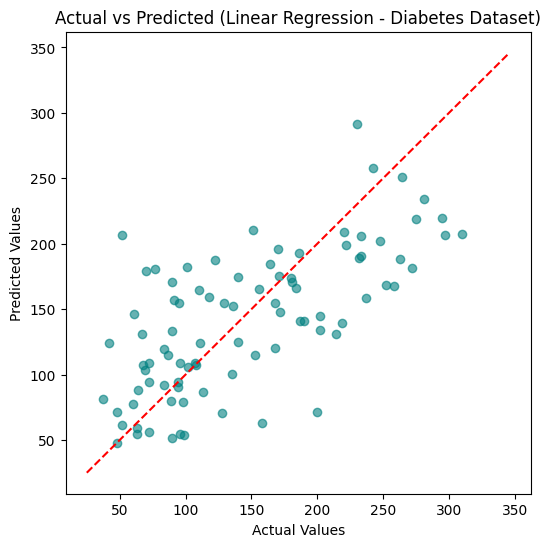

In [9]:
# --- Visualization ---

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression - Diabetes Dataset)")
plt.show()